In [1]:
from utils import build_multimodal_database
import matplotlib.pyplot as plt
from PIL import Image

/mnt/petrelfs/liuziyu/miniconda3/envs/soda/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-03-29 21:23:39,391 - INFO - initial


In [2]:
### give .tsv file path and image path，build multimodal database
tsv_path = "artwork_data.tsv"
image_folder = "artwork_img/"
encoder="intfloat/multilingual-e5-base"
database_name = "test"
txt_collection, img_collection = build_multimodal_database(tsv_path, image_folder, encoder, database_name)

2024-03-29 21:23:39,907 - INFO - Load pretrained SentenceTransformer: intfloat/multilingual-e5-base
2024-03-29 21:23:47,740 - INFO - Use pytorch device_name: cuda
2024-03-29 21:23:50,155 - INFO - Anonymized telemetry enabled. See                     https://docs.trychroma.com/telemetry for more information.
2024-03-29 21:23:50,686 - INFO - Load pretrained SentenceTransformer: intfloat/multilingual-e5-base
2024-03-29 21:23:57,929 - INFO - Loaded ViT-B-32 model config.
2024-03-29 21:23:59,568 - INFO - Loading pretrained ViT-B-32 weights (laion2b_s34b_b79k).
2024-03-29 21:24:00,577 - INFO - Len of data is: 100
2024-03-29 21:24:00,578 - INFO - Begin add text.
Batches: 100%|██████████| 4/4 [00:01<00:00,  2.17it/s]
2024-03-29 21:24:02,584 - INFO - End add text.
2024-03-29 21:24:02,585 - INFO - Begin add images.
2024-03-29 21:24:34,640 - INFO - End add images.
2024-03-29 21:24:34,641 - INFO - ALL DONE!


In [3]:
### change query_text to retrieve
query_text = "dance class"
n_text = 1
ans = txt_collection.query(
    query_texts=[query_text],
    n_results=n_text
)
print(ans)

Batches: 100%|██████████| 1/1 [00:00<00:00, 24.82it/s]

{'ids': [['31']], 'distances': [[0.19025754928588867]], 'metadatas': [[{'ID': '10671.jpg'}]], 'embeddings': None, 'documents': [['AUTHOR: DEGAS, Edgar, BORN-DIED: (b. 1834, Paris, d. 1917, Paris), TITLE: The Dance Class, DATE: 1874, TECHNIQUE: Oil on canvas, 84 x 77 cm, LOCATION: Metropolitan Museum of Art, New York, FORM: painting, TYPE: genre, SCHOOL: French, TIMELINE: 1851-1900']], 'uris': None, 'data': None}


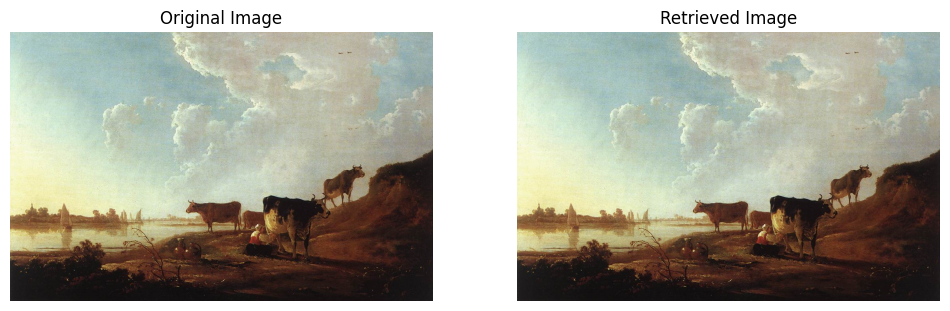

In [4]:
### imput a image
test_image_path = "./test_img.jpg"
n_pictures = 1
ans = img_collection.query(
        query_uris=[test_image_path], # A list of strings representing URIs to data
        n_results=n_pictures
    )
retrieved_image_path = '/mnt/petrelfs/liuziyu/V3Det/Soda/RAG/artwork_img/'+ ans["metadatas"][0][0]["ID"]
retrieved_image_path

# show results
image_path1 = test_image_path
image_path2 = retrieved_image_path

image1 = Image.open(image_path1)
image2 = Image.open(image_path2)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].imshow(image1)
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(image2)
axes[1].set_title('Retrieved Image')
axes[1].axis('off')

plt.show()